# Evaluation
We want to now evaluate the performance of an LLM on the dataset we created. For this we are using the Parsee datasets evaluation tools, as this will also parse the answers of the LLM according to the extraction template, so small variations in an answer are not going to influence the total score.

Set credentials for Parsee Cloud and replicate:

In [1]:
parsee_api_key = "API_KEY"
replicate_api_key = "API_KEY"

Evaluation code

In [3]:
from parsee.cloud.api import ParseeCloud
from parsee.datasets.readers.disk_reader import SimpleCsvDiskReader
from parsee.extraction.models.helpers import replicate_config
from parsee.datasets.evaluation.main import evaluate_llm_performance
from parsee.templates.template_from_json import from_json

cloud = ParseeCloud(parsee_api_key)
template = cloud.get_template("65f959afe34036446ee859ff") # this is the basic invoices template

template = from_json(template_str)

# reading the data from the csv that is included in the repo
reader = SimpleCsvDiskReader("./data/invoices_parsee.csv")

# requires API key from replicate
model = replicate_config(replicate_api_key, "mistralai/mixtral-8x7b-instruct-v0.1")

You can run the model yourself now (will generate some expenses on replicate) or proceed with the results copied from our run below:

In [ ]:
performance = evaluate_llm_performance(template, reader, [model])

Copied performance:

In [4]:
performance = {'Replicate model: mistralai/mixtral-8x7b-instruct-v0.1': {'completion': 1.0, 'total_correct': 36, 'total_correct_meta_found': 43, 'error_log': [{'doc': '47d047dbb6180582d6067fc02b921b51893da220b367600b0e21a9c921e42877', 'class_id': 'general2', 'type': 'main question', 'expected': '2023-07-04', 'actual': 'n/a'}, {'doc': 'a8e5ed8893a293e1c656c658a6bc83b5e298dc1c779d42a64e696034f3927e1b', 'class_id': 'general1', 'type': 'main question', 'expected': 'Google Cloud EMEA Limited', 'actual': 'Google Workspace [5, 11, 19, 21]'}, {'doc': '095331e7f8aec7422fd364016149f45d2ee9864836391103b171c588bbedd779', 'class_id': 'general0', 'type': 'main question', 'expected': '202.8', 'actual': '170.42'}, {'doc': '095331e7f8aec7422fd364016149f45d2ee9864836391103b171c588bbedd779', 'class_id': 'general2', 'type': 'main question', 'expected': '2023-11-01', 'actual': 'n/a'}, {'doc': '80cffb1deaa5788a33cac8c0041645cb3105baf3cacb5480bfa0aef7180fd8a4', 'class_id': 'general1', 'type': 'main question', 'expected': 'Fiverr International Ltd', 'actual': 'Fiverr International Ltd.  as indicated in the electronic document details and company information'}, {'doc': 'b8e5df7bdd684639871117d08d33fc0baadaf3cca66c8ec36374831a4f57d12a', 'class_id': 'general2', 'type': 'main question', 'expected': '2023-05-11', 'actual': '2023-11-05'}, {'doc': '71906c46b8be5927af9ce9b28f5598f2d57ee384c55180e2d8f8a0c5adbaf3ea', 'class_id': 'general1', 'type': 'main question', 'expected': 'Atlassian Pty Ltd', 'actual': 'SimFin Analytics GmbH'}, {'doc': '4212cabbb43594b143f5164716c4ef81f43e18999077f21878b6fe3e3398f2cb', 'class_id': 'general0', 'type': 'meta', 'expected': 'meta0:EUR_meta1:0%', 'actual': 'meta0:EUR_meta1:13%'}, {'doc': '4212cabbb43594b143f5164716c4ef81f43e18999077f21878b6fe3e3398f2cb', 'class_id': 'general0', 'type': 'main question', 'expected': '80.65', 'actual': '14.0'}, {'doc': '32f3b8a2778d0c0f81c920b7076f99df9f5f5ef0e38ff9656ef85d19494142df', 'class_id': 'general0', 'type': 'meta', 'expected': 'meta0:USD_meta1:0%', 'actual': 'meta0:USD_meta1:19%'}, {'doc': 'cbbd23870cc59fe0e14c5f60dea1df1ceba2aec89fd995d1271c5b06e32ad9de', 'class_id': 'general1', 'type': 'main question', 'expected': 'SwissDev', 'actual': 'SwissDev, as indicated in fragment'}], 'total_correct_percent': 0.8, 'total_correct_meta_found_percent': 0.9555555555555556}, 'assigned': {'completion': 1.0, 'total_correct': 45, 'total_correct_meta_found': 45, 'error_log': [], 'total_correct_percent': 1.0, 'total_correct_meta_found_percent': 1.0}}

## Visualisation of results

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
plt.style.use('seaborn-v0_8')

model_names = (model.name,)
scores = {
    'Main Question Accuracy': (performance[model.name]["total_correct_percent"]*100,),
    'Meta Question Accuracy': (performance[model.name]["total_correct_meta_found_percent"]*100,),
    'Total Accuracy': (100*(performance[model.name]["total_correct"] + performance[model.name]["total_correct_meta_found"])/(performance["assigned"]["total_correct"]+performance["assigned"]["total_correct_meta_found"]),),
}

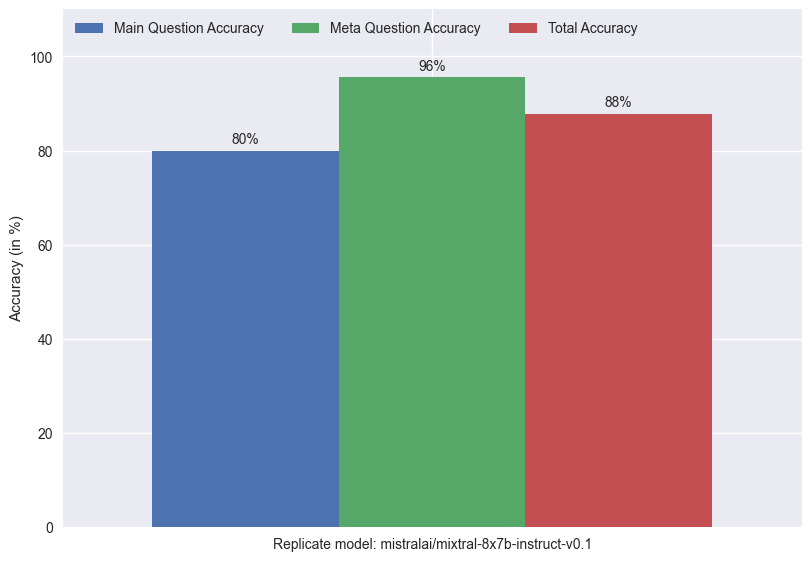

In [8]:
x = np.arange(len(model_names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt='%.0f%%')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (in %)')
ax.set_xticks(x + width, model_names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

x0, x1, y0, y1 = plt.axis()
margin_x = 0.1 * (x1-x0)
margin_y = 0.1 * (y1-y0)
plt.axis((x0 - margin_x,
          x1 + margin_x,
          y0,
          y1 + margin_y))

plt.show()